In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
from scipy.optimize import curve_fit
from scipy.integrate import odeint
from tqdm import tqdm
import itertools
import random
#import warnings
#warnings.filterwarnings('ignore')

#### Import datasets

In [53]:
hill_params = {
    'e11x32STPhoRadA': [8.19215086e+00, 2.77324618e+00, 6.00000000e+00, 1.24643956e+00, 3.56423426e+00, 1.50252702e-10, 3.55907011e+02, 4.95959256e+02],
    'e15x32NpuSspS2': [9.8458614, 8.7957319, 2.89598247, 1.0 , 33.3864939, 26.68735596, 157.80098788, 157.51127152],
    'e16x33NrdA2': [10.13165313, 6.30849837, 5.02963422, 1.26435637, 12.31034403, 5.56520849, 389.61315225, 399.52903402],
    'e20x32gp411': [12.53828935, 1.0, 2.78451886, 1.49241488, 8.42038183, 19.770931, 316.74400613, 314.41729987],
    'e32x30SspGyrB': [10.77387795, 8.56616674, 3.12574014, 1.07032582, 12.42641636, 10.01199595, 353.07383233, 353.36938984],
    'e34x30MjaKlbA': [8.42632247, 13.40974257, 3.28555513, 1.81757507, 8.91852601, 20.20877259, 289.53290172, 287.92030858],
    'e38x32gp418': [7.61231223, 1.51099399, 5.04169259, 1.4068252, 22.75331651, 18.846011, 222.80791219, 223.15092773],
    'e41x32NrdJ1': [9.59574651, 12.05238497, 3.84271899, 1.0, 20.50936546, 14.68953094, 279.98024852, 280.45758993],
    'e42x32STIMPDH1': [10.41225458, 5.87647366, 4.30770405, 1.01184319, 19.08872036, 15.87715881, 232.88219568, 232.90886374]
}
gate_params = {
    "e11x32STPhoRadA": [1.46415109e-02, 6.63450682e+02, 1.58327452e-02, 0.02],
    "e15x32NpuSspS2": [0.03165863, 4.7853412,  0.02219695, 0.02],
    "e16x33NrdA2": [2.21403462e-02, 1.44320142e+02, 2.20095167e-02, 0.02],
    "e20x32gp411": [2.33100887e-02, 9.93028856e+01, 2.26403674e-02, 0.02],
    "e32x30SspGyrB": [ 0.03359541, 10.92812258,  0.02336038, 0.02],
    "e34x30MjaKlbA": [2.05466494e-02, 1.61293627e+02, 2.15819156e-02, 0.02],
    "e38x32gp418": [2.34074609e-02, 9.02122673e+01, 1.89467403e-02, 0.02],
    "e41x32NrdJ1": [2.31185209e-02, 1.45064667e+02, 2.17997477e-02, 0.02],
    "e42x32STIMPDH1": [0.03508648, 0.2788824,  0.02389252, 0.02]
}

In [54]:
od_params = {
    'e11x32STPhoRadA_00': [0.01661466, 1.26727889, 0.01602749],
    'e11x32STPhoRadA_01': [0.01693884, 1.2910957 , 0.01518119],
    'e11x32STPhoRadA_02': [0.01754132, 1.26820153, 0.01502141],
    'e11x32STPhoRadA_03': [0.01637664, 1.27200436, 0.0171057 ],
    'e11x32STPhoRadA_04': [0.01783161, 1.20408286, 0.01200847],
    'e11x32STPhoRadA_05': [0.02113203, 1.05992429, 0.00671933],
    'e11x32STPhoRadA_10': [0.01661369, 1.2634047 , 0.01585347],
    'e11x32STPhoRadA_11': [0.01918392, 1.23571219, 0.00918017],
    'e11x32STPhoRadA_12': [0.01722245, 1.27611318, 0.01427559],
    'e11x32STPhoRadA_13': [0.01773611, 1.22292748, 0.01327679],
    'e11x32STPhoRadA_14': [0.02040226, 1.15007634, 0.00718116],
    'e11x32STPhoRadA_15': [0.02557803, 0.95616111, 0.00288255],
    'e11x32STPhoRadA_20': [0.01750693, 1.20861755, 0.01279274],
    'e11x32STPhoRadA_21': [0.02098759, 1.1329157 , 0.00636957],
    'e11x32STPhoRadA_22': [0.0211607 , 1.07059199, 0.00631756],
    'e11x32STPhoRadA_23': [0.02213714, 0.9960703 , 0.00582744],
    'e11x32STPhoRadA_24': [0.0223059 , 1.04490344, 0.00577656],
    'e11x32STPhoRadA_25': [0.02574845, 0.95117162, 0.00285997],
    'e11x32STPhoRadA_30': [0.01773921, 1.1910255 , 0.01132065],
    'e11x32STPhoRadA_31': [0.02410226, 1.00006235, 0.00339006],
    'e11x32STPhoRadA_32': [0.02350911, 0.91568961, 0.00401871],
    'e11x32STPhoRadA_33': [0.02231126, 0.88258782, 0.00606775],
    'e11x32STPhoRadA_34': [0.02234079, 0.93637752, 0.00589946],
    'e11x32STPhoRadA_35': [0.02085777, 0.93561255, 0.00745841],
    'e11x32STPhoRadA_40': [0.02288471, 1.00748544, 0.00400909],
    'e11x32STPhoRadA_41': [0.0246467 , 0.92471627, 0.00309373],
    'e11x32STPhoRadA_42': [0.02176047, 0.87978881, 0.00552848],
    'e11x32STPhoRadA_43': [0.02094237, 0.84543764, 0.00727375],
    'e11x32STPhoRadA_44': [0.02190222, 0.83865596, 0.00655534],
    'e11x32STPhoRadA_45': [0.02170348, 0.82623535, 0.00584837],
    'e11x32STPhoRadA_50': [0.02479732, 0.88900767, 0.0027895 ],
    'e11x32STPhoRadA_51': [0.02252498, 0.95312968, 0.00406131],
    'e11x32STPhoRadA_52': [0.02243452, 0.79938319, 0.00479524],
    'e11x32STPhoRadA_53': [0.0204116 , 0.80293998, 0.00768791],
    'e11x32STPhoRadA_54': [0.02221669, 0.81683548, 0.0055557 ],
    'e11x32STPhoRadA_55': [0.02131372, 0.81557504, 0.00612091],
    'e15x32NpuSspS2_00': [0.01878441, 1.22535047, 0.0129606 ],
    'e15x32NpuSspS2_01': [0.02102298, 1.21547553, 0.00869933],
    'e15x32NpuSspS2_02': [0.02230221, 1.18484173, 0.00706048],
    'e15x32NpuSspS2_03': [0.02510219, 1.12633691, 0.00452769],
    'e15x32NpuSspS2_04': [0.02966644, 1.05750897, 0.00196459],
    'e15x32NpuSspS2_05': [0.02884451, 1.0719646 , 0.00192886],
    'e15x32NpuSspS2_10': [0.01860296, 1.21902343, 0.01344572],
    'e15x32NpuSspS2_11': [0.02166194, 1.19182495, 0.00727038],
    'e15x32NpuSspS2_12': [0.02422103, 1.12096739, 0.00506079],
    'e15x32NpuSspS2_13': [0.02762277, 1.06242151, 0.00273014],
    'e15x32NpuSspS2_14': [0.02965899, 1.05558581, 0.00217042],
    'e15x32NpuSspS2_15': [0.02835296, 1.03225747, 0.00248805],
    'e15x32NpuSspS2_20': [0.01758372, 1.23225483, 0.01567518],
    'e15x32NpuSspS2_21': [0.02319093, 1.12388673, 0.0053568 ],
    'e15x32NpuSspS2_22': [0.02598914, 1.06544056, 0.00333292],
    'e15x32NpuSspS2_23': [0.03046678, 0.97104567, 0.00177842],
    'e15x32NpuSspS2_24': [0.02970282, 0.99795861, 0.00237585],
    'e15x32NpuSspS2_25': [0.02794322, 1.01389267, 0.00282822],
    'e15x32NpuSspS2_30': [0.01766606, 1.21043157, 0.01535139],
    'e15x32NpuSspS2_31': [0.02513909, 1.0479376 , 0.00356082],
    'e15x32NpuSspS2_32': [0.02653265, 0.99670781, 0.00302749],
    'e15x32NpuSspS2_33': [0.02674922, 1.00035413, 0.00322923],
    'e15x32NpuSspS2_34': [0.02546455, 1.01310525, 0.00407031],
    'e15x32NpuSspS2_35': [0.02531582, 1.0220631 , 0.00389325],
    'e15x32NpuSspS2_40': [0.02035936, 1.1143165 , 0.00878309],
    'e15x32NpuSspS2_41': [0.0244961 , 1.03222865, 0.00393379],
    'e15x32NpuSspS2_42': [0.02709148, 0.94506016, 0.00263326],
    'e15x32NpuSspS2_43': [0.02616106, 0.98200865, 0.00338462],
    'e15x32NpuSspS2_44': [0.02745016, 0.94836826, 0.00265112],
    'e15x32NpuSspS2_45': [0.02495857, 1.00908539, 0.00401017],
    'e15x32NpuSspS2_50': [0.00507292, 2.        , 0.1       ],
    'e15x32NpuSspS2_51': [0.02250361, 1.04171255, 0.00637659],
    'e15x32NpuSspS2_52': [0.02399885, 1.00120684, 0.00485016],
    'e15x32NpuSspS2_53': [0.025362  , 0.98563561, 0.00376791],
    'e15x32NpuSspS2_54': [0.02372242, 1.03099566, 0.00453814],
    'e15x32NpuSspS2_55': [0.02306515, 1.00897715, 0.00509038],
    'e16x33NrdA2_00': [0.01794634, 1.25117382, 0.01582935],
    'e16x33NrdA2_01': [0.01915084, 1.23084904, 0.01272981],
    'e16x33NrdA2_02': [0.01923827, 1.23614222, 0.01208008],
    'e16x33NrdA2_03': [0.02059781, 1.18046513, 0.01076695],
    'e16x33NrdA2_04': [0.02185338, 1.19772475, 0.00740691],
    'e16x33NrdA2_05': [0.01861822, 1.25244149, 0.01222958],
    'e16x33NrdA2_10': [0.01797097, 1.26158182, 0.01501263],
    'e16x33NrdA2_11': [0.02144097, 1.17812239, 0.00832893],
    'e16x33NrdA2_12': [0.02075154, 1.18192454, 0.00902768],
    'e16x33NrdA2_13': [0.02256941, 1.12885551, 0.00686104],
    'e16x33NrdA2_14': [0.02643127, 1.01898692, 0.00317863],
    'e16x33NrdA2_15': [0.02684056, 0.98244565, 0.00293608],
    'e16x33NrdA2_20': [0.01758568, 1.24566855, 0.0158011 ],
    'e16x33NrdA2_21': [0.02073886, 1.16056267, 0.00869319],
    'e16x33NrdA2_22': [0.02120458, 1.14541143, 0.00808954],
    'e16x33NrdA2_23': [0.02418543, 1.06179709, 0.00542299],
    'e16x33NrdA2_24': [0.02713762, 0.97685817, 0.00272519],
    'e16x33NrdA2_25': [0.02643708, 0.93582878, 0.0039406 ],
    'e16x33NrdA2_30': [0.01800153, 1.21684512, 0.01408105],
    'e16x33NrdA2_31': [0.02291385, 1.077182  , 0.00561493],
    'e16x33NrdA2_32': [0.02546697, 1.05116286, 0.003949  ],
    'e16x33NrdA2_33': [0.0271796 , 0.94309637, 0.00329475],
    'e16x33NrdA2_34': [0.02826019, 0.91700853, 0.00284028],
    'e16x33NrdA2_35': [0.02665288, 0.95185484, 0.00264949],
    'e16x33NrdA2_40': [0.02054706, 1.1285409 , 0.00812139],
    'e16x33NrdA2_41': [0.02617934, 0.97066267, 0.00308618],
    'e16x33NrdA2_42': [0.02586904, 0.96629482, 0.00344712],
    'e16x33NrdA2_43': [0.02929994, 0.86835616, 0.00241629],
    'e16x33NrdA2_44': [0.0292533 , 0.87489408, 0.00214726],
    'e16x33NrdA2_45': [0.03099641, 0.8553338 , 0.00128789],
    'e16x33NrdA2_50': [0.02607739, 0.89185531, 0.00313421],
    'e16x33NrdA2_51': [0.0262054 , 0.90282135, 0.00317064],
    'e16x33NrdA2_52': [0.02449789, 0.95732994, 0.00416132],
    'e16x33NrdA2_53': [0.02337442, 0.98179397, 0.00541186],
    'e16x33NrdA2_54': [0.02497233, 0.98977938, 0.00393842],
    'e16x33NrdA2_55': [0.02461179, 1.00519955, 0.00388033],
    'e20x32gp411_00': [0.018292  , 1.22551519, 0.01343365],
    'e20x32gp411_01': [0.02032236, 1.19533053, 0.00990077],
    'e20x32gp411_02': [0.02050383, 1.19234687, 0.01014814],
    'e20x32gp411_03': [0.02037805, 1.192538  , 0.01045209],
    'e20x32gp411_04': [0.02228077, 1.17137677, 0.00692874],
    'e20x32gp411_05': [0.02307141, 1.093578  , 0.00665284],
    'e20x32gp411_10': [0.01856236, 1.2119591 , 0.01228321],
    'e20x32gp411_11': [0.01994424, 1.19097869, 0.01074321],
    'e20x32gp411_12': [0.0202542 , 1.1995264 , 0.01043745],
    'e20x32gp411_13': [0.02035124, 1.19299079, 0.01015664],
    'e20x32gp411_14': [0.02260657, 1.15734206, 0.00627824],
    'e20x32gp411_15': [0.02447574, 1.07493102, 0.00451078],
    'e20x32gp411_20': [0.01753124, 1.22851292, 0.01397985],
    'e20x32gp411_21': [0.02062041, 1.14430815, 0.00868617],
    'e20x32gp411_22': [0.02040908, 1.16040485, 0.00980443],
    'e20x32gp411_23': [0.02041239, 1.15560267, 0.0101105 ],
    'e20x32gp411_24': [0.02275696, 1.12145837, 0.00615854],
    'e20x32gp411_25': [0.02437257, 1.08513808, 0.00451892],
    'e20x32gp411_30': [0.01785297, 1.18543498, 0.01291109],
    'e20x32gp411_31': [0.02325565, 1.07702994, 0.00540032],
    'e20x32gp411_32': [0.0220427 , 1.07785666, 0.00696462],
    'e20x32gp411_33': [0.02198888, 1.06793668, 0.00739757],
    'e20x32gp411_34': [0.02376675, 1.03470016, 0.00505615],
    'e20x32gp411_35': [0.02362669, 1.05058772, 0.00495239],
    'e20x32gp411_40': [0.01812329, 1.16526238, 0.01148423],
    'e20x32gp411_41': [0.02340769, 1.00721911, 0.00478286],
    'e20x32gp411_42': [0.02339382, 1.02026156, 0.00520385],
    'e20x32gp411_43': [0.02387083, 0.99987826, 0.0047239 ],
    'e20x32gp411_44': [0.02385501, 1.00700622, 0.00412082],
    'e20x32gp411_45': [0.02322195, 1.00349985, 0.00540321],
    'e20x32gp411_50': [0.00493021, 2.        , 0.1       ],
    'e20x32gp411_51': [0.0214622 , 1.01736254, 0.0065146 ],
    'e20x32gp411_52': [0.02161249, 1.04601815, 0.00683178],
    'e20x32gp411_53': [0.02193525, 1.02831547, 0.00663346],
    'e20x32gp411_54': [0.02110606, 1.05514818, 0.00678593],
    'e20x32gp411_55': [0.0204242 , 1.07379343, 0.00761755],
    'e32x30SspGyrB_00': [0.01753929, 1.24272419, 0.01847286],
    'e32x30SspGyrB_01': [0.01849524, 1.24662188, 0.0152172 ],
    'e32x30SspGyrB_02': [0.01896865, 1.22730992, 0.01415796],
    'e32x30SspGyrB_03': [0.01898606, 1.21520986, 0.01321803],
    'e32x30SspGyrB_04': [0.01864668, 1.22222556, 0.012951  ],
    'e32x30SspGyrB_05': [0.01803842, 1.23197853, 0.01696892],
    'e32x30SspGyrB_10': [0.01810167, 1.22723219, 0.01647713],
    'e32x30SspGyrB_11': [0.0190822 , 1.21758082, 0.01309204],
    'e32x30SspGyrB_12': [0.01926111, 1.20615297, 0.01227248],
    'e32x30SspGyrB_13': [0.0198444 , 1.18515674, 0.01047575],
    'e32x30SspGyrB_14': [0.02048693, 1.19747899, 0.00935552],
    'e32x30SspGyrB_15': [0.02449415, 1.02823113, 0.00565018],
    'e32x30SspGyrB_20': [0.01772897, 1.21426682, 0.01668519],
    'e32x30SspGyrB_21': [0.01909457, 1.19083624, 0.01239694],
    'e32x30SspGyrB_22': [0.01999557, 1.16876755, 0.00990953],
    'e32x30SspGyrB_23': [0.02140369, 1.11725579, 0.00769495],
    'e32x30SspGyrB_24': [0.02514648, 1.04456667, 0.00395338],
    'e32x30SspGyrB_25': [0.02888082, 1.00423951, 0.00245002],
    'e32x30SspGyrB_30': [0.01897369, 1.14895592, 0.01265463],
    'e32x30SspGyrB_31': [0.01987651, 1.15037622, 0.01019411],
    'e32x30SspGyrB_32': [0.02149857, 1.09493338, 0.00726395],
    'e32x30SspGyrB_33': [0.02458717, 0.99304716, 0.00450076],
    'e32x30SspGyrB_34': [0.02678991, 0.9847882 , 0.003252  ],
    'e32x30SspGyrB_35': [0.02632776, 1.02679106, 0.00392115],
    'e32x30SspGyrB_40': [0.02103989, 1.06042733, 0.00842682],
    'e32x30SspGyrB_41': [0.02276179, 1.0240222 , 0.00570206],
    'e32x30SspGyrB_42': [0.02414568, 0.98152288, 0.00452746],
    'e32x30SspGyrB_43': [0.02585686, 0.90594284, 0.00375712],
    'e32x30SspGyrB_44': [0.02507303, 0.93423253, 0.00425689],
    'e32x30SspGyrB_45': [0.02500404, 0.96392393, 0.00501434],
    'e32x30SspGyrB_50': [0.02337563, 0.93821477, 0.00547582],
    'e32x30SspGyrB_51': [0.02539301, 0.9520122 , 0.003897  ],
    'e32x30SspGyrB_52': [0.02384199, 0.9338342 , 0.00448052],
    'e32x30SspGyrB_53': [0.02462617, 0.91961291, 0.00345666],
    'e32x30SspGyrB_54': [0.02304624, 0.93999712, 0.00468283],
    'e32x30SspGyrB_55': [0.02213313, 0.99882496, 0.00688157],
    'e34x30MjaKlbA_00': [0.01942088, 1.23571493, 0.01275168],
    'e34x30MjaKlbA_01': [0.01967624, 1.20302557, 0.01003042],
    'e34x30MjaKlbA_02': [0.01996303, 1.19450099, 0.0100082 ],
    'e34x30MjaKlbA_03': [0.02009779, 1.17917918, 0.0094287 ],
    'e34x30MjaKlbA_04': [0.01924203, 1.20350995, 0.01040213],
    'e34x30MjaKlbA_05': [0.0227635 , 1.10489661, 0.00639434],
    'e34x30MjaKlbA_10': [0.01906503, 1.22393314, 0.01317839],
    'e34x30MjaKlbA_11': [0.01990562, 1.19150562, 0.01014172],
    'e34x30MjaKlbA_12': [0.01931896, 1.19562871, 0.01091639],
    'e34x30MjaKlbA_13': [0.01952837, 1.18278979, 0.00988593],
    'e34x30MjaKlbA_14': [0.02002127, 1.17259126, 0.00908832],
    'e34x30MjaKlbA_15': [0.02083285, 1.14971329, 0.00839913],
    'e34x30MjaKlbA_20': [0.01752831, 1.21656047, 0.01739564],
    'e34x30MjaKlbA_21': [0.01827553, 1.19094193, 0.01296218],
    'e34x30MjaKlbA_22': [0.01851488, 1.17489184, 0.01200882],
    'e34x30MjaKlbA_23': [0.01933993, 1.13393823, 0.00985746],
    'e34x30MjaKlbA_24': [0.02182792, 1.09705468, 0.00599343],
    'e34x30MjaKlbA_25': [0.02249786, 1.07510763, 0.00593482],
    'e34x30MjaKlbA_30': [0.01973716, 1.1309739 , 0.0111286 ],
    'e34x30MjaKlbA_31': [0.02253201, 1.08350833, 0.00582074],
    'e34x30MjaKlbA_32': [0.02213352, 1.04164886, 0.00594954],
    'e34x30MjaKlbA_33': [0.02297501, 1.02116209, 0.00442507],
    'e34x30MjaKlbA_34': [0.02498103, 0.97879463, 0.00311919],
    'e34x30MjaKlbA_35': [0.02381851, 0.96786795, 0.00468189],
    'e34x30MjaKlbA_40': [0.02244676, 1.02877333, 0.00678406],
    'e34x30MjaKlbA_41': [0.02491283, 0.94641685, 0.00363648],
    'e34x30MjaKlbA_42': [0.02486956, 0.92865568, 0.00364429],
    'e34x30MjaKlbA_43': [0.02369308, 0.95307531, 0.0037671 ],
    'e34x30MjaKlbA_44': [0.02388729, 0.92586226, 0.00352709],
    'e34x30MjaKlbA_45': [0.02490482, 0.91029793, 0.00354194],
    'e34x30MjaKlbA_50': [0.00759805, 1.53726051, 0.1       ],
    'e34x30MjaKlbA_51': [0.00503678, 2.        , 0.1       ],
    'e34x30MjaKlbA_52': [0.00793445, 1.43798794, 0.1       ],
    'e34x30MjaKlbA_53': [0.00418853, 2.        , 0.1       ],
    'e34x30MjaKlbA_54': [0.01327873, 1.25692877, 0.02718153],
    'e34x30MjaKlbA_55': [0.01958702, 1.02561476, 0.00839958],
    'e38x32gp418_00': [0.01830746, 1.24757692, 0.01761273],
    'e38x32gp418_01': [0.01933477, 1.22140337, 0.01284864],
    'e38x32gp418_02': [0.01986058, 1.20675995, 0.01178087],
    'e38x32gp418_03': [0.01957653, 1.21098456, 0.01299898],
    'e38x32gp418_04': [0.02218659, 1.14772051, 0.0096569 ],
    'e38x32gp418_05': [0.01598898, 1.29529573, 0.02835029],
    'e38x32gp418_10': [0.01842462, 1.24274024, 0.01769401],
    'e38x32gp418_11': [0.02036337, 1.19677457, 0.0111073 ],
    'e38x32gp418_12': [0.0203548 , 1.19616827, 0.01044317],
    'e38x32gp418_13': [0.02298741, 1.12353438, 0.00789787],
    'e38x32gp418_14': [0.02616428, 1.08565945, 0.00439777],
    'e38x32gp418_15': [0.02722857, 1.01389432, 0.00354   ],
    'e38x32gp418_20': [0.01806199, 1.23462663, 0.01747354],
    'e38x32gp418_21': [0.01963284, 1.19525174, 0.01210369],
    'e38x32gp418_22': [0.02076302, 1.15768149, 0.00880294],
    'e38x32gp418_23': [0.02290655, 1.09698659, 0.00701037],
    'e38x32gp418_24': [0.02725411, 1.01023176, 0.00371995],
    'e38x32gp418_25': [0.02673439, 0.99352126, 0.00367813],
    'e38x32gp418_30': [0.01877892, 1.19817938, 0.0146752 ],
    'e38x32gp418_31': [0.02126019, 1.13063938, 0.00831414],
    'e38x32gp418_32': [0.02218623, 1.0967662 , 0.00649929],
    'e38x32gp418_33': [0.02410249, 1.04103654, 0.00623986],
    'e38x32gp418_34': [0.02674241, 0.9940836 , 0.00373546],
    'e38x32gp418_35': [0.02271445, 1.03689621, 0.00754318],
    'e38x32gp418_40': [0.02202411, 1.07390183, 0.00803488],
    'e38x32gp418_41': [0.02483806, 1.02248625, 0.00443546],
    'e38x32gp418_42': [0.02426335, 1.01141196, 0.00451895],
    'e38x32gp418_43': [0.02625308, 0.94475767, 0.00420765],
    'e38x32gp418_44': [0.0258985 , 0.99596605, 0.00425739],
    'e38x32gp418_45': [0.02414365, 0.96875742, 0.00547093],
    'e38x32gp418_50': [0.02466794, 0.95915077, 0.00490895],
    'e38x32gp418_51': [0.02507195, 0.95584767, 0.00408828],
    'e38x32gp418_52': [0.02279978, 1.01470025, 0.00543135],
    'e38x32gp418_53': [0.02347964, 1.00964505, 0.0056378 ],
    'e38x32gp418_54': [0.02556714, 0.98346713, 0.00428937],
    'e38x32gp418_55': [0.02372208, 0.97598305, 0.00532748],
    'e41x32NrdJ1_00': [0.02019919, 1.20491543, 0.01315701],
    'e41x32NrdJ1_01': [0.02127188, 1.1751632 , 0.00964331],
    'e41x32NrdJ1_02': [0.0212094, 1.1641555, 0.0095141],
    'e41x32NrdJ1_03': [0.02323586, 1.13234194, 0.00794158],
    'e41x32NrdJ1_04': [0.02274803, 1.12548774, 0.00823598],
    'e41x32NrdJ1_05': [0.02454743, 1.06014468, 0.00527513],
    'e41x32NrdJ1_10': [0.01974899, 1.20745866, 0.01398198],
    'e41x32NrdJ1_11': [0.02110001, 1.17100561, 0.00997782],
    'e41x32NrdJ1_12': [0.02101705, 1.16584907, 0.00985636],
    'e41x32NrdJ1_13': [0.02272288, 1.12830653, 0.00837577],
    'e41x32NrdJ1_14': [0.02393452, 1.08577247, 0.00695561],
    'e41x32NrdJ1_15': [0.02293675, 1.06980163, 0.00731136],
    'e41x32NrdJ1_20': [0.01814369, 1.2212622 , 0.01776297],
    'e41x32NrdJ1_21': [0.01922682, 1.20929907, 0.01296489],
    'e41x32NrdJ1_22': [0.02080214, 1.13526167, 0.00955058],
    'e41x32NrdJ1_23': [0.02076455, 1.12523834, 0.00971059],
    'e41x32NrdJ1_24': [0.02446774, 1.02338278, 0.00623802],
    'e41x32NrdJ1_25': [0.02188807, 1.07881167, 0.00837372],
    'e41x32NrdJ1_30': [0.01892631, 1.18127641, 0.015115  ],
    'e41x32NrdJ1_31': [0.02177979, 1.10816427, 0.00748928],
    'e41x32NrdJ1_32': [0.0210141 , 1.11054178, 0.00918957],
    'e41x32NrdJ1_33': [0.02282462, 1.05042782, 0.00762435],
    'e41x32NrdJ1_34': [0.0232129, 1.028558 , 0.0066856],
    'e41x32NrdJ1_35': [0.02332189, 1.00627648, 0.00591365],
    'e41x32NrdJ1_40': [0.0229499 , 1.049589  , 0.00754532],
    'e41x32NrdJ1_41': [0.02357145, 1.03941316, 0.00499951],
    'e41x32NrdJ1_42': [0.02412162, 0.97367925, 0.00504254],
    'e41x32NrdJ1_43': [0.02378827, 0.98532265, 0.0056041 ],
    'e41x32NrdJ1_44': [0.02260425, 1.00565268, 0.00661385],
    'e41x32NrdJ1_45': [0.02344727, 0.96414068, 0.00556864],
    'e41x32NrdJ1_50': [0.00891539, 1.37789797, 0.1       ],
    'e41x32NrdJ1_51': [0.02173608, 1.05169216, 0.00670879],
    'e41x32NrdJ1_52': [0.02282382, 0.98758339, 0.00633821],
    'e41x32NrdJ1_53': [0.02281598, 0.97561768, 0.00697573],
    'e41x32NrdJ1_54': [0.02174267, 0.9874846 , 0.00809387],
    'e41x32NrdJ1_55': [0.01944937, 1.05365333, 0.01056595],
    'e42x32STIMPDH1_00': [0.01769413, 1.2515926 , 0.01911216],
    'e42x32STIMPDH1_01': [0.01835995, 1.24361942, 0.01523035],
    'e42x32STIMPDH1_02': [0.01880937, 1.22376549, 0.01446612],
    'e42x32STIMPDH1_03': [0.0182261 , 1.21827537, 0.01510714],
    'e42x32STIMPDH1_04': [0.02063385, 1.11571406, 0.00879319],
    'e42x32STIMPDH1_05': [0.01850431, 1.13399165, 0.01276832],
    'e42x32STIMPDH1_10': [0.01793672, 1.24985801, 0.01779444],
    'e42x32STIMPDH1_11': [0.01956542, 1.21731388, 0.01215915],
    'e42x32STIMPDH1_12': [0.01981282, 1.19318658, 0.0105737 ],
    'e42x32STIMPDH1_13': [0.02215715, 1.11008937, 0.00679599],
    'e42x32STIMPDH1_14': [0.02420942, 1.02944275, 0.00477153],
    'e42x32STIMPDH1_15': [0.02298573, 1.02260339, 0.00569218],
    'e42x32STIMPDH1_20': [0.01689066, 1.25892859, 0.0213658 ],
    'e42x32STIMPDH1_21': [0.01938664, 1.17844516, 0.0114078 ],
    'e42x32STIMPDH1_22': [0.02227536, 1.08988237, 0.00747855],
    'e42x32STIMPDH1_23': [0.02320108, 1.0486387 , 0.00586587],
    'e42x32STIMPDH1_24': [0.02331149, 1.02095617, 0.0051897 ],
    'e42x32STIMPDH1_25': [0.02288975, 1.03207116, 0.00530524],
    'e42x32STIMPDH1_30': [0.01914198, 1.15766353, 0.01326858],
    'e42x32STIMPDH1_31': [0.02009122, 1.12981185, 0.00908938],
    'e42x32STIMPDH1_32': [0.02150725, 1.09360776, 0.00808958],
    'e42x32STIMPDH1_33': [0.02207252, 1.06047436, 0.00673522],
    'e42x32STIMPDH1_34': [0.02214873, 1.03786997, 0.00608264],
    'e42x32STIMPDH1_35': [0.02090954, 1.08549444, 0.00706339],
    'e42x32STIMPDH1_40': [0.02224596, 1.04359696, 0.00771019],
    'e42x32STIMPDH1_41': [0.02499108, 0.96349818, 0.00391387],
    'e42x32STIMPDH1_42': [0.02522634, 0.96060621, 0.00400048],
    'e42x32STIMPDH1_43': [0.02236183, 1.01030298, 0.00627743],
    'e42x32STIMPDH1_44': [0.02252724, 0.98250998, 0.00589216],
    'e42x32STIMPDH1_45': [0.01963484, 1.07563416, 0.00818667],
    'e42x32STIMPDH1_50': [0.02491107, 0.91968327, 0.00468513],
    'e42x32STIMPDH1_51': [0.023968  , 0.94744507, 0.00522909],
    'e42x32STIMPDH1_52': [0.0225372 , 0.97972385, 0.00607495],
    'e42x32STIMPDH1_53': [0.02130008, 1.00192234, 0.00667936],
    'e42x32STIMPDH1_54': [0.01981044, 1.04137295, 0.00851054],
    'e42x32STIMPDH1_55': [0.01996711, 1.0247033 , 0.00704323]
 }

In [3]:
fluos = pd.read_csv('datasets/induction_matrix/induction_fluo.csv', index_col='time')
gates = ['e15x32NpuSspS2', 'e16x33NrdA2', 'e20x32gp411', 'e32x30SspGyrB',
         'e34x30MjaKlbA', 'e38x32gp418', 'e41x32NrdJ1', 'e42x32STIMPDH1']
cumas = [0, 6.25, 12.5, 25, 50, 100]
aras = [0, 0.8125, 3.25, 13, 52, 208]

#### Layering the Gates

In [4]:
class Gate:
    def __init__(self, name, gate_params, hill_params, num_states, num_params):
        
        #metadata
        self.name = name
        self.num_states = num_states
        self.num_params = num_params
        
        #parameters
        self.r = gate_params[0]
        self.y0 = gate_params[1]
        self.synGFP = gate_params[2]
        self.degGFP = gate_params[3]
        self.K1 = hill_params[0]
        self.K2 = hill_params[1]
        self.n1 = hill_params[2]
        self.n2 = hill_params[3]
        self.ymin1 = hill_params[4]
        self.ymin2 = hill_params[5]
        self.ymax1 = hill_params[6]
        self.ymax2 = hill_params[7]
        
        #initial states
        self.y = self.y0
        self.GFP = 0
        
        #derivative states
        self.dy = 0
        self.dGFP = 0
        
        #connection
        self.connection = None
        
    def get_params(self):
        return [self.r, self.y0, self.syn_GFP, self.deg_GFP]
    
    def get_init_states(self):
        return [self.y, self.GFP]
    
class Connection:
    def __init__(self, name, input1, input2, output, level, index, input1_idx, input2_idx, output_idx):
        
        self.name = name
        self.index = index
        self.level = level #0: input, 1: intermediate, 2:output
        
        self.input1 = input1
        self.input2 = input2
        self.output = output
        
        self.input1_idx = input1_idx
        self.input2_idx = input2_idx
        self.output_idx = output_idx
         
class Circuit:
    def __init__(self, arrangement, inducers):
        
        #inducers
        self.inducers = inducers
        
        #gate
        self.gates = []
        for arr in arrangement:
            self.gates.append(Gate(arr, gate_params[arr], hill_params[arr], 2, 11))
        
        self.connections = [
            Connection('c1', self.inducers[0], self.inducers[1], None, 0, 0, 0, 1, 4),
            Connection('c2', self.inducers[2], self.inducers[3], None, 0, 1, 2, 3, 4),
            Connection('c3', self.inducers[4], self.inducers[5], None, 0, 4, 0, 1, 6),
            Connection('c4', self.inducers[6], self.inducers[7], None, 0, 3, 6, 7, 5),
            Connection('c5', self.gates[0], self.gates[1], None, 1, 4, 0, 1, 6),
            Connection('c6', self.gates[2], self.gates[3], None, 1, 5, 2, 3, 6),
            Connection('c7', self.gates[4], self.gates[5], None, 2, 6, 4, 5, 6)
        ]
        
        for i, g in enumerate(self.gates):
            g.connection = self.connections[i]

    def get_all_params(self):
        params = []
        for g in self.gates:
            params.append(g.get_params())
        return np.array(params)
    
    def get_all_init_states(self):
        init_states = []
        for g in self.gates:
            init_states.append(g.get_init_states())
        return np.array(init_states)

In [51]:
def hill_activation(x, K, n, ymin, ymax):
    return  ymin + (ymax - ymin) * (x**n / (K**n + x**n))

def hill_activation_and(x, K1, K2, n1, n2, ymin1, ymin2, ymax1, ymax2):
    x1, x2 = x
    return hill_activation(x1, K1, n1, ymin1, ymax1) * hill_activation(x2, K2, n2, ymin2, ymax2)

def gate_wrapper(t, circuit, num_states):
    
    y0 = np.array([g.get_init_states() for g in circuit.gates]).ravel()
    
    def gate_model(y, t):
        
        yi = np.reshape(y, (-1, num_states))
        yn = []

        for i, g in enumerate(circuit.gates):
            
            g.y, g.GFP = yi[i]
            
            #level 0 (input)
            if g.connection.level==0:
                
                ymax = hill_activation_and((circuit.inducers[i*2], circuit.inducers[(i*2)+1]), g.K1, g.K2, g.n1, g.n2, g.ymin1, g.ymin2, g.ymax1, g.ymax2)
                #print(i, ymax)
                g.dy = g.r * (1 - (g.y/ymax)) * g.y
                yn.append([g.dy, g.dGFP])
                
            #level 1 (middle)
            elif g.connection.level==1:

                input1 = g.connection.input1
                input2 = g.connection.input2
                ymax = hill_activation_and((input1.y, input2.y), g.K1, g.K2, g.n1, g.n2, g.ymin1, g.ymin2, g.ymax1, g.ymax2)
                g.dy = g.r * (1 - (g.y/ymax)) * g.y
                #g.dGFP = g.synGFP * g.y - g.degGFP * g.GFP
                yn.append([g.dy, g.dGFP])
                
            #level 2 (output)
            elif g.connection.level==2:
                
                input1 = g.connection.input1
                input2 = g.connection.input2
                ymax = hill_activation_and((input1.y, input2.y), g.K1, g.K2, g.n1, g.n2, g.ymin1, g.ymin2, g.ymax1, g.ymax2)
                g.dy = g.r * (1 - (g.y/ymax)) * g.y
                g.dGFP = g.synGFP * g.y - g.degGFP * g.GFP
                yn.append([g.dy, g.dGFP])
        
        return np.array(yn).ravel()
    
    solution = odeint(gate_model, y0, t)
    return solution.transpose()

In [49]:
selected_gates = [3, 1, 4, 2, 5, 0, 6]
[gates[g] for g in selected_gates]

['e32x30SspGyrB',
 'e16x33NrdA2',
 'e34x30MjaKlbA',
 'e20x32gp411',
 'e38x32gp418',
 'e15x32NpuSspS2',
 'e41x32NrdJ1']

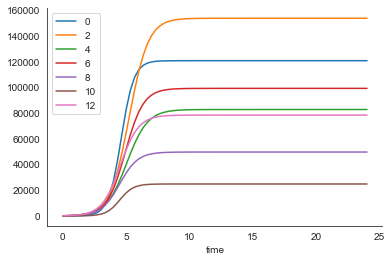

In [52]:
circuit1 = Circuit([gates[g] for g in selected_gates], [cumas[5], aras[5]] * 4)
model = gate_wrapper(fluos.index, circuit1, 2)
for i, m in enumerate(model):
    if i%2==0:
        pd.Series(m, index=fluos.index/60, name=i).plot()
plt.legend()
sns.despine()

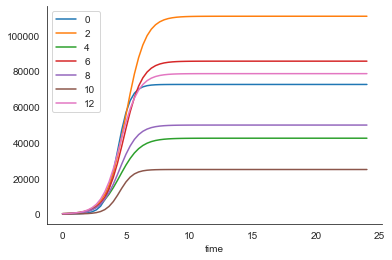

In [47]:
circuit2 = Circuit([gates[g] for g in selected_gates], [cumas[3], aras[3]] * 4)
model = gate_wrapper(fluos.index, circuit2, 2)
for i, m in enumerate(model):
    if i%2==0:
        pd.Series(m, index=fluos.index/60, name=i).plot()
plt.legend()
sns.despine()

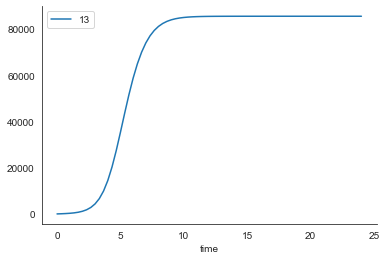

In [43]:
circuit1 = Circuit([gates[g] for g in selected_gates], [cumas[5], aras[5]] * 4)
model = gate_wrapper(fluos.index, circuit1, 2)
#print('****************')
pd.Series(model[13], index=fluos.index/60, name=i).plot()
plt.legend()
sns.despine()

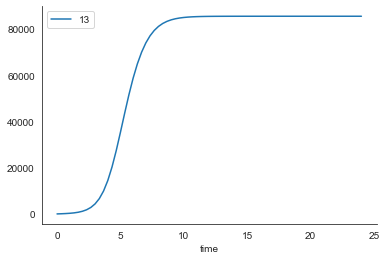

In [42]:
circuit2 = Circuit([gates[g] for g in selected_gates], [cumas[3], aras[3]] * 4)
#circuit3 = Circuit([gates[g] for g in selected_gates], [cumas[1], aras[1]] * 4)
model = gate_wrapper(fluos.index, circuit2, 2)
#print('****************')
pd.Series(model[13], index=fluos.index/60, name=i).plot()
plt.legend()
sns.despine()

### Genetic Algorithm

In [6]:
def initialPopulation(pop_size, num_indiv, length):
    population = []
    arrangement = np.arange(num_indiv)
    for i in range(pop_size):
        new_arrangement = [i for i in arrangement]
        np.random.shuffle(new_arrangement)
        population.append(new_arrangement[:length])
    return np.array(population)

def calculateFitness(pop):
    
    f_t = fluos.index
    fitness = []
    
    for i, p in enumerate(pop):
        #circuit = Circuit(fluo_selected, od_selected, gate_params_selected, od_params_selected, None, p)
        #model = gate_wrapper2(f_t, circuit)
        #gfp = pd.Series(model[33], index=f_t/60)
        
        circuit = Circuit(gates[:7], [cumas[2], aras[2]] * 4)
        model = gate_wrapper(fluos.index, circuit, 2)
        gfp = pd.Series(model[13], index=fluos.index/60)
        
        fitness.append(gfp.max()-gfp.min())
    return np.array(fitness)

def rankIndiv(population):
    
    fitness = calculateFitness(population)
    fitnessResults = [(a, b) for a, b in zip(population, fitness)]
    return np.array(sorted(fitnessResults, key=lambda x: x[1], reverse=True))

def selection(popRanked, eliteSize):
    
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults

def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        selected = selectionResults[i]
        matingpool.append(selected)
    return matingpool

def breed(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []
    
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])
        
    childP2 = [item for item in parent2 if item not in childP1]

    child = childP1 + childP2
    
    return child

def breedPopulation(matingpool, eliteSize, length):
    
    children = []
    nonElite = len(matingpool) - eliteSize
    pool = random.choices(matingpool, k=len(matingpool))

    for i in range(0, eliteSize):
        children.append(matingpool[i])
    
    for i in range(0, nonElite):
        child = breed(pool[i], pool[len(matingpool)-i-1])
        children.append(child[:length])
    
    return np.array(children)

def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))
            
            city1 = individual[swapped]
            city2 = individual[swapWith]
            
            individual[swapped] = city2
            individual[swapWith] = city1
    return individual

def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return np.array(mutatedPop)

def nextGeneration(currentGen, eliteSize, mutationRate, length):
    
    popRanked = rankIndiv(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize, length)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration

def geneticAlgorithm(popSize, eliteSize, mutationRate, generations, candidates, length):
    pop = initialPopulation(popSize, candidates, length)
    pop_copy = [i for i in pop]
    
    for i in tqdm(range(0, generations)):
        pop = nextGeneration(pop, eliteSize, mutationRate, length)
    return pop_copy, rankIndiv(pop)

pop_copy, result = geneticAlgorithm(popSize=100, eliteSize=20, mutationRate=0.01, generations=20, candidates=len(gates[:7]), length=7)
result

  0%|          | 0/20 [00:00<?, ?it/s]<ipython-input-6-407a47266a93>:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(sorted(fitnessResults, key=lambda x: x[1], reverse=True))
100%|██████████| 20/20 [01:00<00:00,  3.01s/it]


array([[array([3, 1, 4, 2, 5, 0, 6]), 85568.97204460927],
       [array([0, 6, 3, 1, 4, 2, 5]), 85568.97204460927],
       [array([3, 2, 0, 4, 5, 1, 6]), 85568.97204460927],
       [array([6, 5, 3, 2, 1, 0, 4]), 85568.97204460927],
       [array([4, 6, 3, 0, 1, 5, 2]), 85568.97204460927],
       [array([2, 6, 0, 5, 3, 4, 1]), 85568.97204460927],
       [array([5, 6, 0, 4, 1, 2, 3]), 85568.97204460927],
       [array([0, 2, 4, 1, 3, 6, 5]), 85568.97204460927],
       [array([6, 5, 1, 3, 2, 4, 0]), 85568.97204460927],
       [array([4, 0, 6, 3, 2, 5, 1]), 85568.97204460927],
       [array([2, 4, 3, 6, 1, 0, 5]), 85568.97204460927],
       [array([1, 5, 6, 4, 3, 0, 2]), 85568.97204460927],
       [array([5, 1, 4, 6, 0, 2, 3]), 85568.97204460927],
       [array([5, 6, 2, 0, 4, 1, 3]), 85568.97204460927],
       [array([1, 3, 0, 2, 5, 6, 4]), 85568.97204460927],
       [array([6, 4, 3, 1, 2, 5, 0]), 85568.97204460927],
       [array([4, 0, 2, 5, 1, 6, 3]), 85568.97204460927],
       [array(

### Exhaustive Search

In [ ]:
gate_params_selected = [par['Value'] for par in f_df_deg]
all_arr = [list(a) for a in list(itertools.permutations(np.arange(len(gate_params_selected)), 7))]
len(all_arr)

In [ ]:
gate_params_selected = [par['Value'] for par in f_df_deg]
#arr = np.arange(len(gate_params_selected))
#np.random.shuffle(arr)
#print(arr)
f_t = fluo_selected.index

results = []
for i, arr in enumerate(tqdm(all_arr)):
    circuit = Circuit(fluo_selected, od_selected, gate_params_selected, od_params_selected, None, arr)
    model = gate_wrapper2(f_t, circuit)
    gfp = pd.Series(model[33], index=f_t/60)
    dyn = gfp.max() - gfp.min()
    results.append((dyn, arr))

In [ ]:
best_results = sorted(results, reverse=True)[:10]
print('Best result', best_results[0][0])
for i, res in enumerate(tqdm(best_results)):
    circuit = Circuit(fluo_selected, od_selected, gate_params_selected, od_params_selected, None, res[1])
    model = gate_wrapper2(f_t, circuit)
    gfp = pd.Series(model[33], index=f_t/60)
    plt.plot(gfp, label= res[1])
plt.legend(bbox_to_anchor=(1.05, 1), ncol=2)
sns.despine()
plt.show()

In [ ]:
gate_params_selected = [par['Value'] for par in f_df_deg]
ga_arrangement = result[0][0]
print(ga_arrangement)

f_t = fluo_selected.index
for ar in pop_copy[:1]:

    circuit = Circuit(fluo_selected, od_selected, gate_params_selected, od_params_selected, None, ga_arrangement)
    model = gate_wrapper2(f_t, circuit)
    gfp = pd.Series(model[33], index=f_t/60)
    print(gfp.max()-gfp.min())
    plt.plot(gfp, label=ga_arrangement)
plt.legend(bbox_to_anchor=(1.05, 1), ncol=2)
sns.despine()
plt.show()

In [ ]:
final_asg = fluo_selected[[fluo_selected.columns[j] for j in ga_arrangement]]
num_col = 7
num_row = 1
f, axs = plt.subplots(num_row, num_col, sharex=True, sharey=True, figsize=(14, num_row*2))
axr = axs.ravel()
for i, ax in enumerate(axr):
    if i < num_traces:
        ax.plot(final_asg.index / 60, final_asg.iloc[:, i])
        ax.set_title(final_asg.columns[i])
        ax.set_xlabel('Time (h)')
    else:
        ax.set_visible(False)
plt.tight_layout()
sns.despine()

In [ ]:
def geneticAlgorithmPlot(pop_copy, popSize, eliteSize, mutationRate, generations, candidates, length):
    pop = [i for i in pop_copy]
    progress = []
    progress.append(rankIndiv(pop)[0][1])
    
    for i in tqdm(range(0, generations)):
        pop = nextGeneration(pop, eliteSize, mutationRate, length)
        progress.append(rankIndiv(pop)[0][1])
    return progress
    
progress = geneticAlgorithmPlot(pop_copy, popSize=100, eliteSize=20, mutationRate=0.01, generations=20, candidates=len(selected), length=7)
plt.figure(figsize=[6, 4])
plt.plot(progress[:20])
plt.ylabel('Dynamic Range')
plt.xlabel('Generation')
sns.despine()
plt.show()

In [ ]:
circuit = Circuit(gates[:7], [cumas[2], aras[2]] * 4)
model = gate_wrapper(fluos.index, circuit, 2)
gfp = pd.Series(model[13], index=fluos.index/60)